## Import Libraries

In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

## Data Exploration

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


## Add Channel Dimension

### Why are we doing this?

The channel dimension indicates the number of color channels in the input data. The mnist dataset does not have a channel dimension but consist of grayscale images. Passing it Keras Conv2D as is will result in an error during the training process because it is seen as 3D. We define the grayscale channel as 1 to match what Conv2D is expecting, a 4D format,

In [4]:
# Reshape x_train to add a channel dimension
x_train = np.expand_dims(x_train, -1) # Now x_train shape will be (6000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

In [5]:
# Each image is a 28 x 28 x 1 numpy array
x_train[100].shape

(28, 28, 1)

5


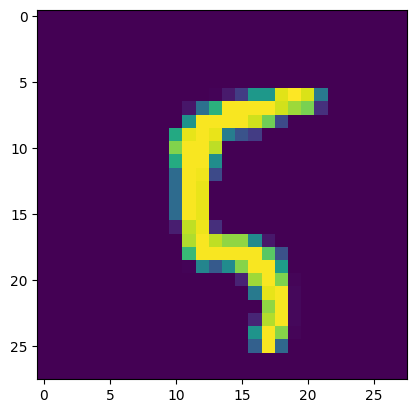

In [6]:
print(y_train[100])
plt.imshow(x_train[100])

## Make everything float and scale

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Building the CNN

## Initial CNN

In [8]:
filters = 32
kernel_size = (3, 3)
num_neurons = 64 # arbitrary

In [9]:
model_1 = Sequential()

# 3x3 convolution with (1,1) stride and 32 filters
model_1.add(Conv2D(filters, kernel_size = kernel_size, padding='same', input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

# Additional 3x3 convolution with (1,1) stride and 32 filters
model_1.add(Conv2D(filters, kernel_size = kernel_size))
model_1.add(Activation('relu'))

# 2x2 max pooling reduces to 14 x 14 x 1
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

# Flatten turns 14x14x1 to 
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

model_1.summary()


d:\Dev\Machine_Learning\tackleml\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,769,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,784,106 (10.62 MB)

 Trainable params: 2,784,106 (10.62 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# RMSprop optimizer
optimizer = keras.optimizers.RMSprop(learning_rate=0.0005)

In [11]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
# Compile the model
model_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model_1.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - accuracy: 0.8909 - loss: 0.3445 - val_accuracy: 0.9818 - val_loss: 0.0592
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9783 - loss: 0.0716 - val_accuracy: 0.9854 - val_loss: 0.0430
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9847 - loss: 0.0532 - val_accuracy: 0.9885 - val_loss: 0.0339
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9878 - loss: 0.0401 - val_accuracy: 0.9900 - val_loss: 0.0302
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9894 - loss: 0.0365 - val_accuracy: 0.9892 - val_loss: 0.0354
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9901 - loss: 0.0332 - val_accuracy: 0.9874 - val_loss: 0.0385
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9914 - loss: 0.0281 - val_accuracy: 0.9902 - val_loss: 0.0283
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9921 -

## Test

In [13]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.026083866134285927
accuracy= 0.9915000200271606
